In [4]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [11]:
import calendar
import datetime as dt
import plotly.express as px

In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Unemployment in India.csv']))
df1 = pd.read_csv(io.BytesIO(uploaded['Unemployment_Rate_upto_11_2020.csv']))

In [6]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
df1.shape

(267, 9)

In [9]:
df1.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98

In [16]:
#creating a separate column for month
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df1['month_int'] =  df1['Date'].dt.month
df1['month'] =  df1['month_int'].apply(lambda x: calendar.month_abbr[x])
df1.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


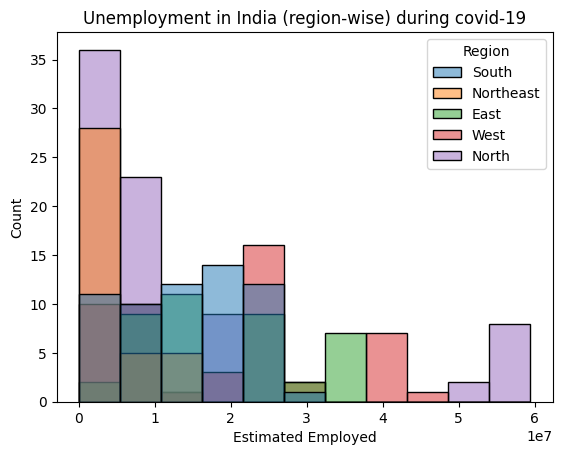

In [14]:
#Unemplyment rate in different regions in India
df1.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Unemployment in India (region-wise) during covid-19")
sns.histplot(x="Estimated Employed", hue="Region", data=df1)
plt.show()

In [ ]:
#unemployement rate during covid-19 using bar plot
bar_plot = px.bar(df1,x="Region",y=" Estimated Unemployment Rate (%)",color="Region",
                  title='Unemployement rate state-wise', template='plotly')
bar_plot.update_layout(xaxis={'categoryorder':'total descending'})
bar_plot.show()

In [ ]:
#Unemployment rate during covid-19 using histogram
hist_plot = px.histogram(df1,x="Region",y=" Estimated Unemployment Rate (%)",color="Region",
                  title='Unemployement rate state-wise', template='plotly')
hist_plot.update_layout(xaxis={'categoryorder':'total descending'})
hist_plot.show()

In [ ]:
#Region wise analysis of unemployment rate in India

before_covid19= df1[(df1['month_int'] >= 1) & (df1['month_int'] <4)]
after_covid19 = df1[(df1['month_int'] >= 4) & (df1['month_int'] <=6)]
after_lockdown = after_covid19.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

covid = before_covid19.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()
covid['Unemployment Rate Before Covid19'] = after_lockdown['Estimated Unemployment Rate']

covid.columns = ['Region','Unemployment Rate Before Covid19','Unemployment Rate After Covid19']
covid

,Region,Unemployment Rate Before Covid19,Unemployment Rate After Covid19
0,East,27.370000,12.940000
1,North,16.538333,14.760455
2,Northeast,11.838333,14.123750
3,South,5.942857,14.073889
4,West,11.016667,6.917727


In [ ]:
#State wise analysis of unemployment rate in India
before_covid19= df1[(df1['month_int'] >= 1) & (df1['month_int'] <4)]
after_covid19 = df1[(df1['month_int'] >= 4) & (df1['month_int'] <=6)]
after_lockdown = after_covid19.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

covid = before_covid19.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
covid['Unemployment Rate Before Covid19'] = after_lockdown['Estimated Unemployment Rate']

covid.columns = ['States','Unemployment Rate Before Covid19','Unemployment Rate After Covid19']
covid

,States,Unemployment Rate Before Covid19,Unemployment Rate After Covid19
0,Andhra Pradesh,6.495000,5.655000
1,Assam,4.660000,6.078000
2,Bihar,24.120000,22.502500
3,Chhattisgarh,11.666667,4.736667
4,Delhi,9.400000,18.535000
5,Goa,8.890000,10.516000
6,Gujarat,12.493333,2.872000
7,Haryana,28.840000,23.495000
8,Himachal Pradesh,12.750000,16.835000
9,Jammu & Kashmir,21.080000,16.764000
